In [1]:
!git clone https://github.com/gowun/MABTest.git

Cloning into 'MABTest'...
remote: Enumerating objects: 180, done.
remote: Counting objects: 100% (180/180), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 180 (delta 113), reused 129 (delta 62), pack-reused 0
Receiving objects: 100% (180/180), 241.69 KiB | 5.75 MiB/s, done.
Resolving deltas: 100% (113/113), done.


In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


In [0]:
from MABTest import Mass_MAB as mmab
from MABTest import user as usr
from MABTest import utils as ut
from MABTest import Mass_Simulation as ms

In [0]:
labels = ['TS', 'BayesUCB', 'UCB1', 'UCBtune']
posProb = [1.0, 1.0]

In [0]:
def make_users(nUser, nItem, posProb):
  users = []
  for i in range(nUser):
    it_prob = np.random.random_sample(nItem)
    #print(str(i) + ': ' + str(it_prob))
    users.append(usr.User(posProb, it_prob))

  return users

In [0]:
nUser = 100
nItem = 5
users = make_users(nUser, nItem, posProb)

In [0]:
def bunch_simulation(setting, users, n_item, pos_prob, len_simulation, n_simulation, model_accs=[]):
  results = []
  labels = ['TS', 'BayesUCB', 'UCB1', 'UCBtune']
  mab_list = [mmab.Mass_MAB(len(users), list(range(n_item)), pos_prob, l+s[0], s[1]) for l in labels]
  for m in mab_list:
    tmp = ms.Mass_Simulation(m, users, len_simulation, n_simulation, model_accs)
    results.append(tmp.mean_simulation())
    print(results[-1][1])
  return results

In [8]:
%%time
model_accs = [0.8, 0.5]
results_per_setting = []
setting = [['', 0], ['_wScore', 1], ['_wScore', 2]]

for i, s in enumerate(setting):
  print(i)
  if i == 0:
    mc = []
  else:
    mc = model_accs[:i]
  results_per_setting.append(bunch_simulation(s, users, 5, posProb, 12, 50, mc))

0
[ 0.42317087  0.35712506 -0.4473616  -0.06565373  0.18970919 -0.85161509
 -0.40522894 -1.19100861 -0.14152869 -1.15715086 -3.16719032 -2.76532713]
[-0.66790553  0.30473422 -0.54649357 -1.70791135 -1.09520687 -1.45042376
 -0.81658881 -0.74223151  0.61944358 -0.03465947  1.21203152  0.4591621 ]
[0.8486453  0.96407387 1.46141641 0.55594744 0.6862832  2.01477618
 3.40261726 3.35794241 3.43843943 2.72681976 3.47150788 3.13802825]
[-0.772261   -0.11338717 -1.20894199 -0.8619514  -0.03496081  0.57202978
  0.29902037  0.88601096  2.01300155  2.09999214  3.24698273  3.89397332]
1
[-1.1293909  -0.06622741 -0.0474904   1.27615598  1.42171242  1.3650237
  1.48873074  1.35945796  0.8291216  -0.23166618  0.69757154  0.52277152]
[0.62165198 1.3261867  1.86704651 1.65578319 1.67516453 1.3035078
 2.14243921 3.0056053  3.23431638 2.67002301 2.08384261 2.21849329]
[-1.10806185 -1.69699729 -1.78180555 -1.76083297 -2.89193919 -2.77962547
 -2.54269479 -3.56104685 -3.2108782  -4.84111941 -4.51783841 -3.452

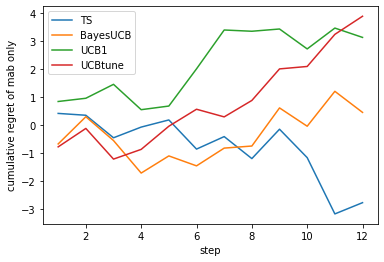

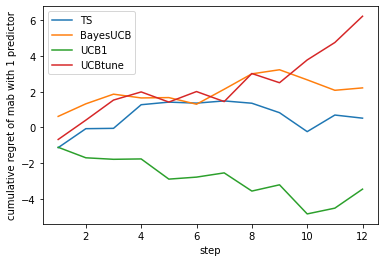

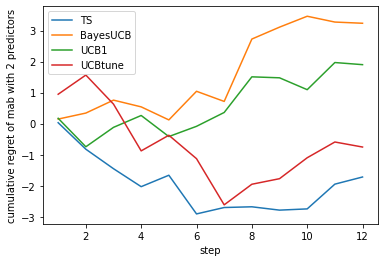

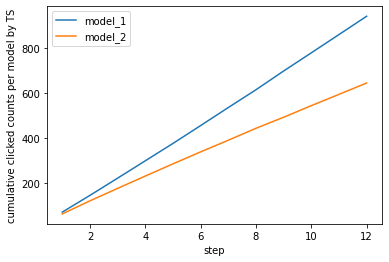

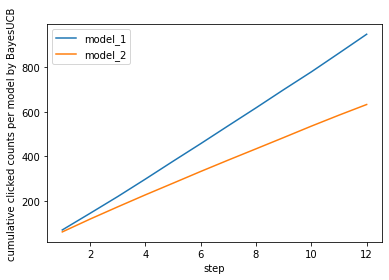

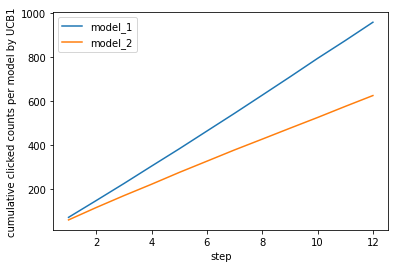

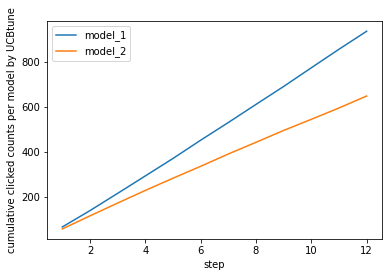

In [9]:
y_labels = list(map(lambda x: 'cumulative regret of ' + x, ['mab only', 'mab with 1 predictor', 'mab with 2 predictors']))
for i, y in enumerate(y_labels):
  tmp = list(map(lambda x: results_per_setting[i][x][1], range(len(labels))))
  ut.comparison_figure(list(range(1, 13)), tmp, labels, 'step', y)
  if i == 2:
    yy_label = 'cumulative clicked counts per model by '
    for j, l in enumerate(labels):
      ut.comparison_figure(list(range(1, 13)), results_per_setting[i][j][2], ['model_1', 'model_2'], 'step', yy_label+l)